<a href="https://colab.research.google.com/github/AkshitxVerma/Reinforcement_learning/blob/main/Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
class PowerSocket:
    def __init__(self, q):
        self.q = q
        self.initialize()
    def initialize(self):
        self.Q = 0
        self.n = 0
    def charge(self):
        value = np.random.randn() + self.q
        return 0 if value < 0 else value
    def update(self,R):
        self.n += 1
        self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * R
    def sample(self):
        return self.Q


In [2]:

import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize


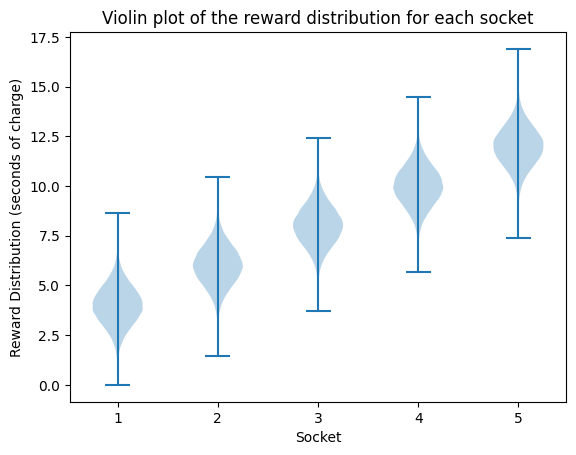

In [17]:
socket_order = [1,2,3,4,5]
sockets = [PowerSocket((q*2)+2) for q in socket_order]
NUM_SOCKETS = len(socket_order)
TOTAL_STEPS = 100000
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))
for socket_number,socket in enumerate(sockets):
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()
plt.violinplot(rewards)
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)')
plt.title('Violin plot of the reward distribution for each socket')
plt.show()


<ipython-input-19-d33d61e9eac1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-19-d33d61e9eac1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

(0, 0.5, 'Density')

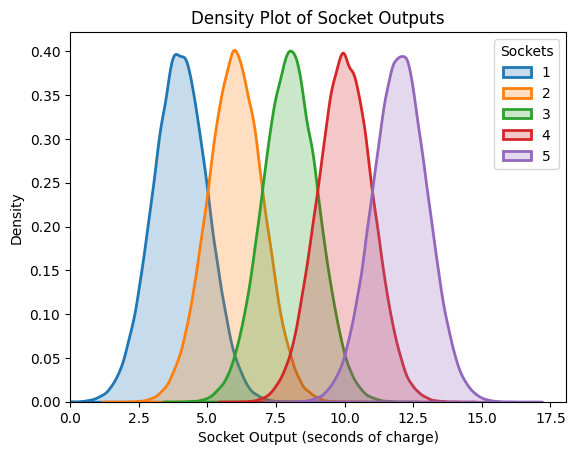

In [19]:
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')
(0, 0.5, 'Density')
